# Chargement des packages

In [1]:

# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

# Base de données Diabetes

La base de données "Diabetes" est disponible sur [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Cette base de données contient des informations sur des patientes féminines âgées d'au moins 21 ans et provenant de populations amérindiennes Pima, qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.

## Contenu de la base de données

La base de données contient les colonnes suivantes :

- `Pregnancies` : nombre de grossesses
- `Glucose` : concentration de glucose dans le plasma sanguin à jeun
- `BloodPressure` : pression artérielle diastolique (mm Hg)
- `SkinThickness` : épaisseur du pli cutané tricipital (mm)
- `Insulin` : taux d'insuline sérique de 2 heures (mu U/ml)
- `BMI` : indice de masse corporelle (kg/m²)
- `DiabetesPedigreeFunction` : fonction pedigree du diabète
- `Age` : âge (années)
- `Outcome` : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)

## Objectif de l'analyse

L'objectif de cette analyse est de construire un modèle de classification pour prédire si une patiente a un diabète de type 2 en fonction de ses caractéristiques cliniques. Cette base de données sera divisée en ensembles d'apprentissage et de test pour entraîner et évaluer les performances du modèle.


# Importation et nettoyage des données

In [2]:
# Chargement des données
diabete=pd.read_csv("diabetes.csv")

In [3]:

diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Affichage des informations générales sur le DataFrame
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Description des données

In [5]:
# Affichage des statistiques descriptives du DataFrame
diabete.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(diabete.nunique())


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [7]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(diabete.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


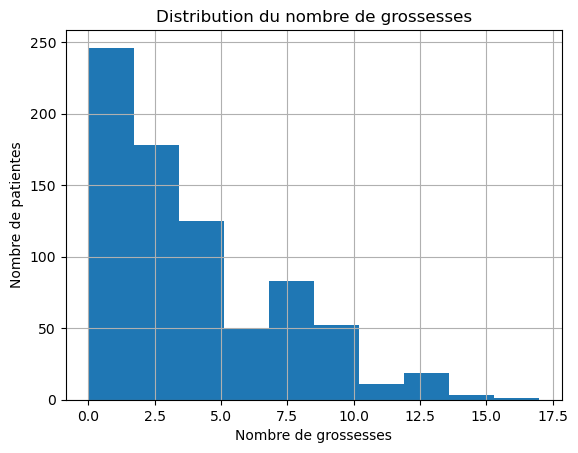

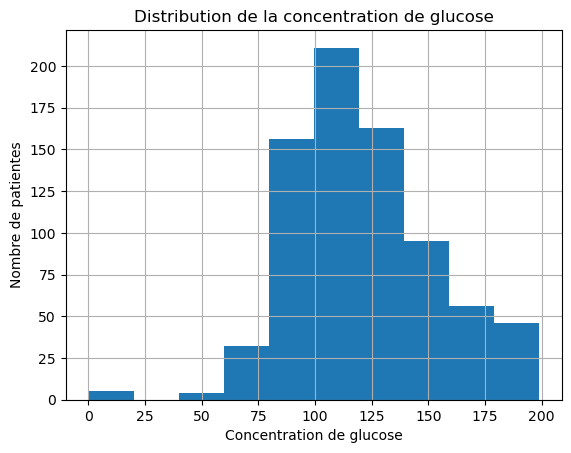

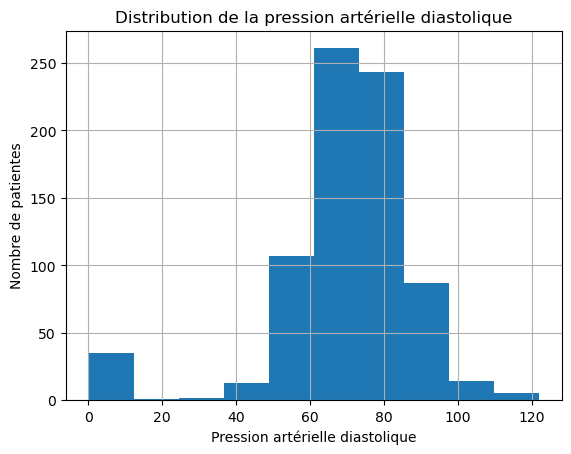

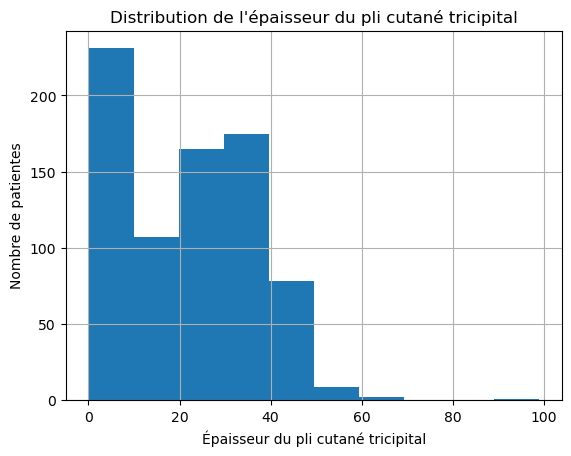

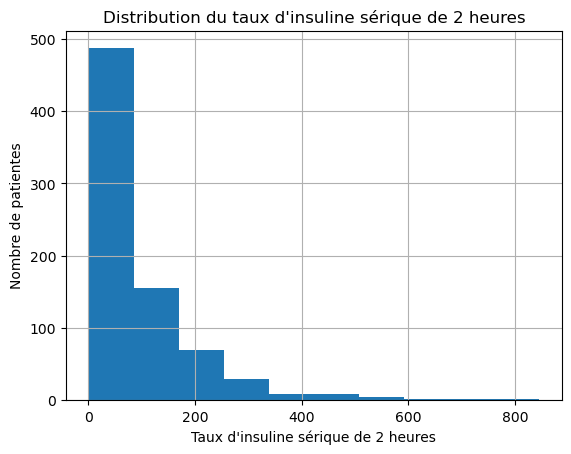

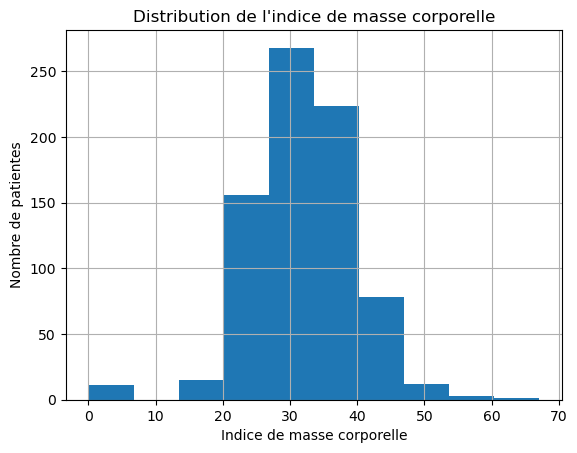

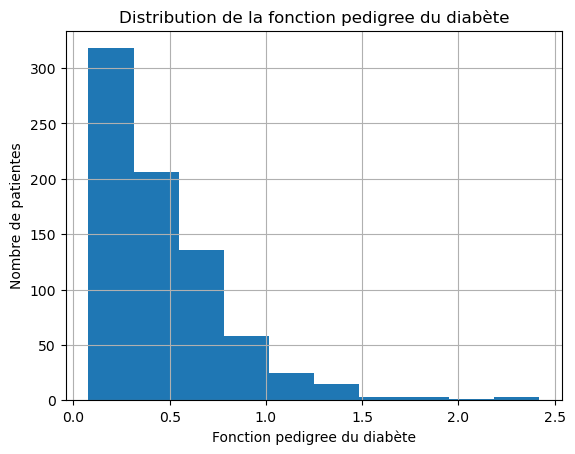

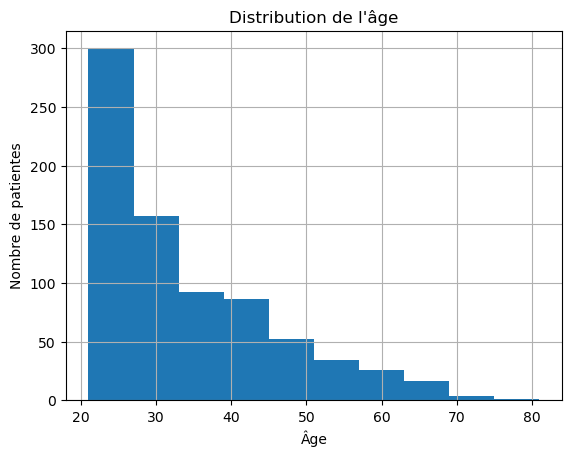

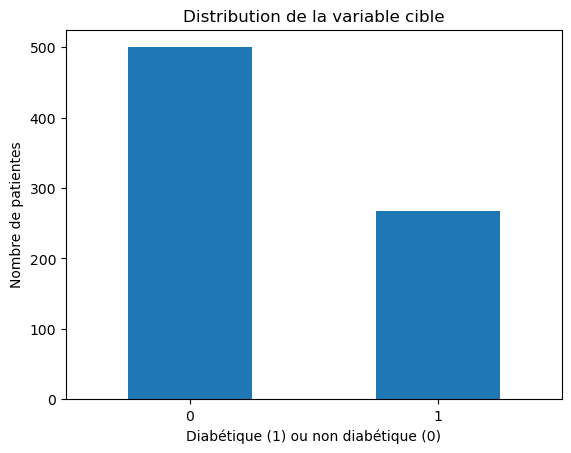

In [8]:

# Histogramme de la variable 'Pregnancies'
diabete['Pregnancies'].hist()
plt.title('Distribution du nombre de grossesses')
plt.xlabel('Nombre de grossesses')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Glucose'
diabete['Glucose'].hist()
plt.title('Distribution de la concentration de glucose')
plt.xlabel('Concentration de glucose')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BloodPressure'
diabete['BloodPressure'].hist()
plt.title('Distribution de la pression artérielle diastolique')
plt.xlabel('Pression artérielle diastolique')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'SkinThickness'
diabete['SkinThickness'].hist()
plt.title('Distribution de l\'épaisseur du pli cutané tricipital')
plt.xlabel('Épaisseur du pli cutané tricipital')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Insulin'
diabete['Insulin'].hist()
plt.title('Distribution du taux d\'insuline sérique de 2 heures')
plt.xlabel('Taux d\'insuline sérique de 2 heures')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BMI'
diabete['BMI'].hist()
plt.title('Distribution de l\'indice de masse corporelle')
plt.xlabel('Indice de masse corporelle')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'DiabetesPedigreeFunction'
diabete['DiabetesPedigreeFunction'].hist()
plt.title('Distribution de la fonction pedigree du diabète')
plt.xlabel('Fonction pedigree du diabète')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Age'
diabete['Age'].hist()
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de patientes')
plt.show()

# Diagramme en barres de la variable 'Outcome'
diabete['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible')
plt.xlabel('Diabétique (1) ou non diabétique (0)')
plt.ylabel('Nombre de patientes')
plt.xticks(rotation=0)
plt.show()

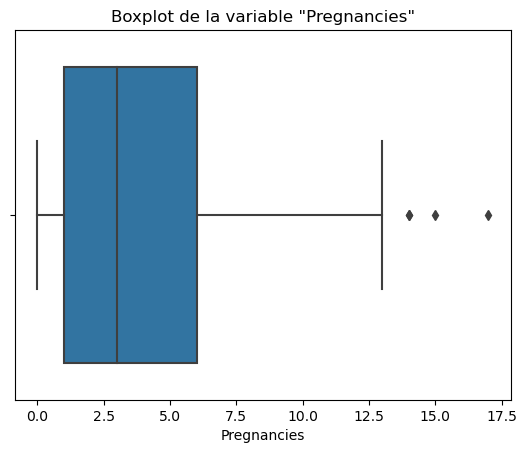

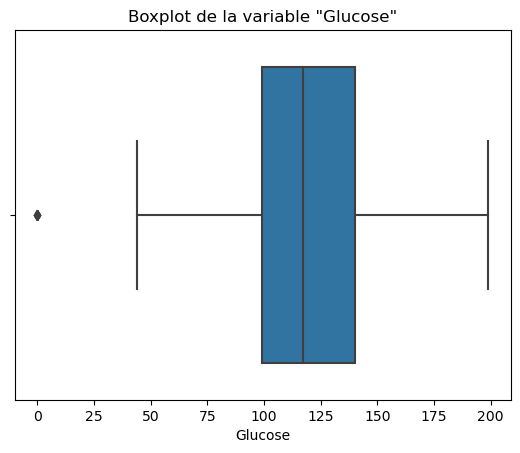

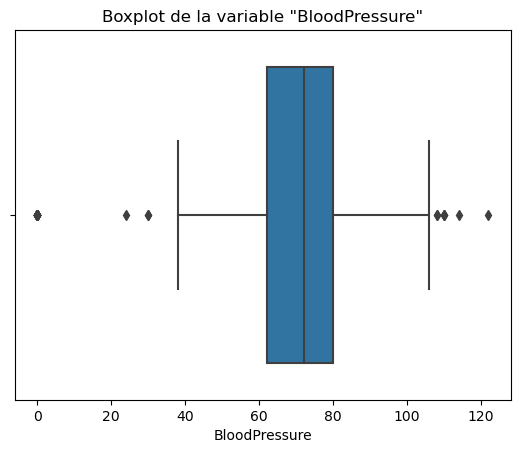

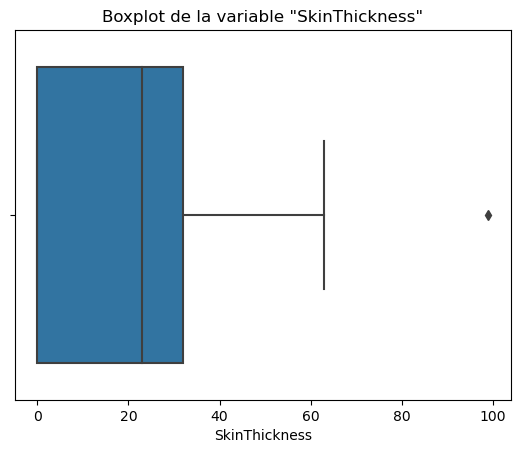

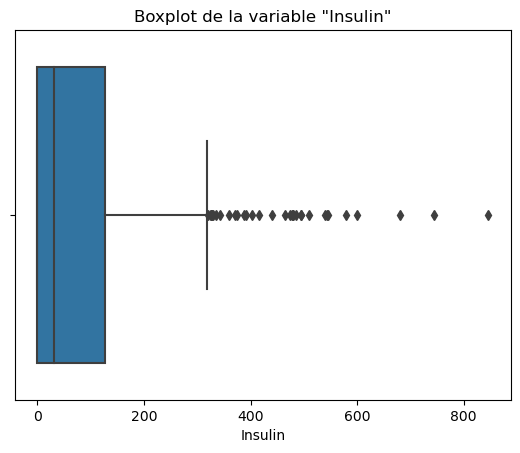

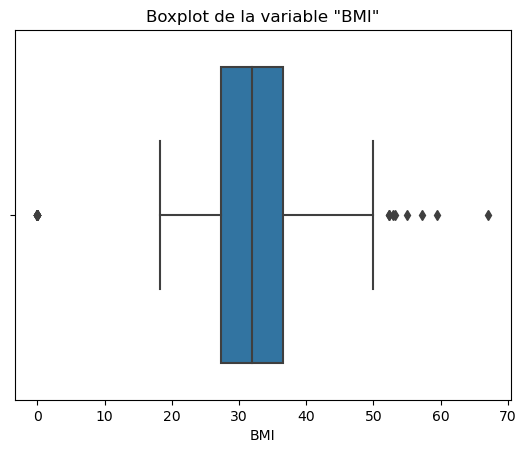

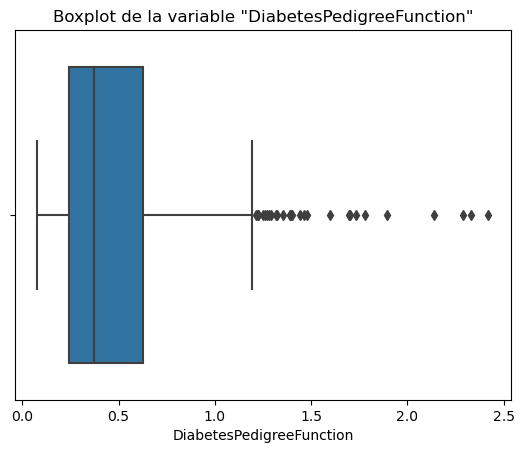

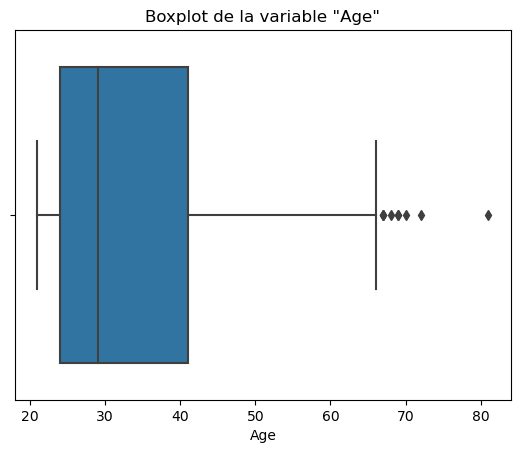

In [9]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(x=diabete[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

## Analyse des liaisons entre les variables

In [10]:
# Génération du pairplot
sns.pairplot(data=diabete, hue='Outcome', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

KeyboardInterrupt: 

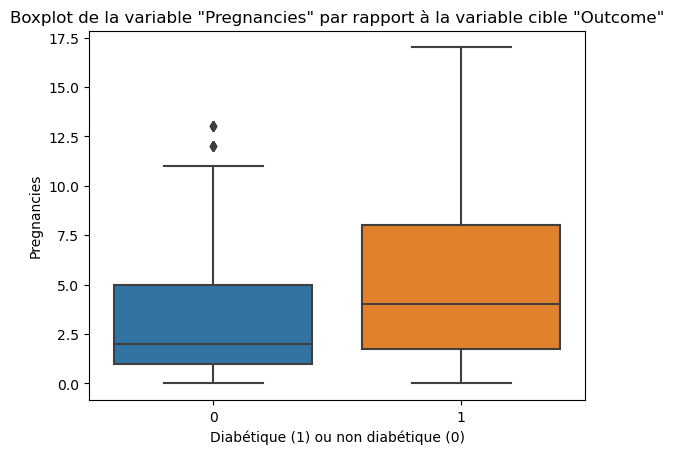

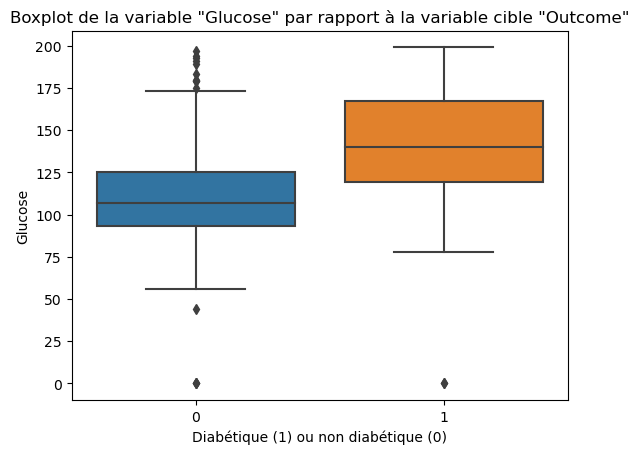

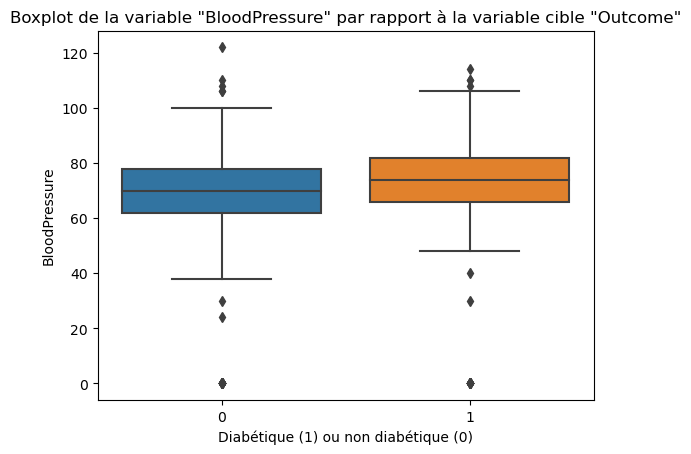

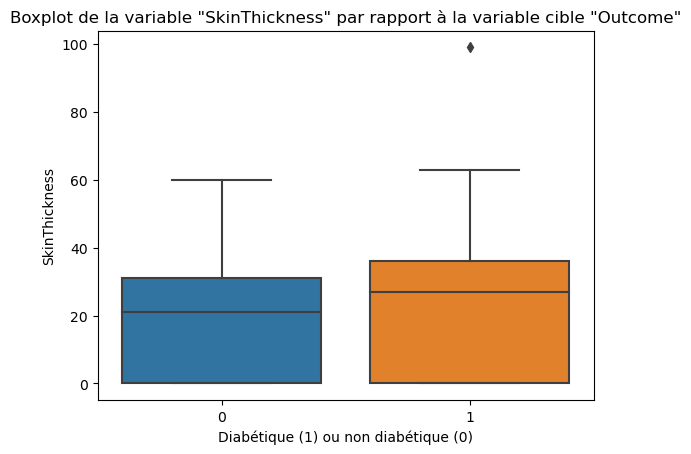

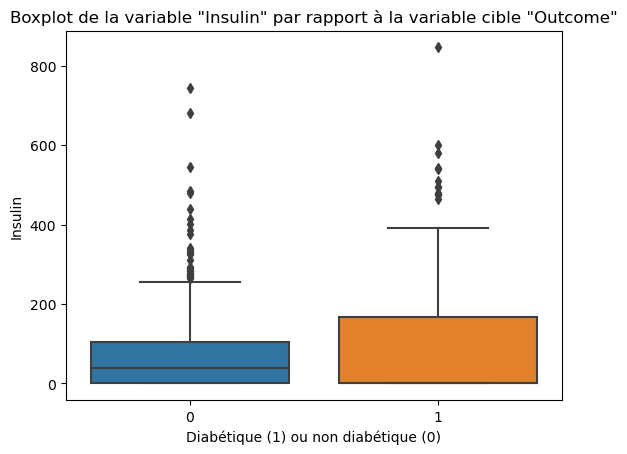

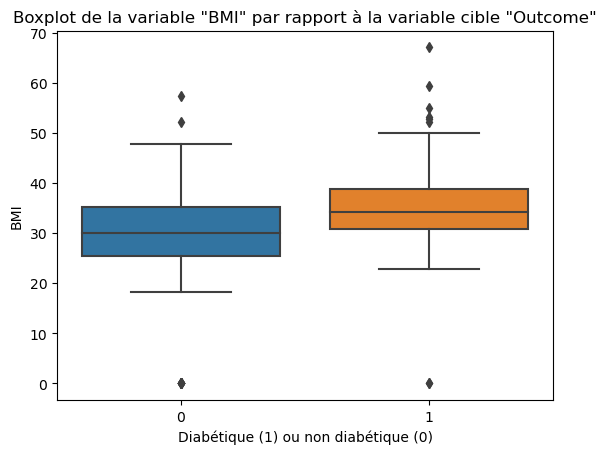

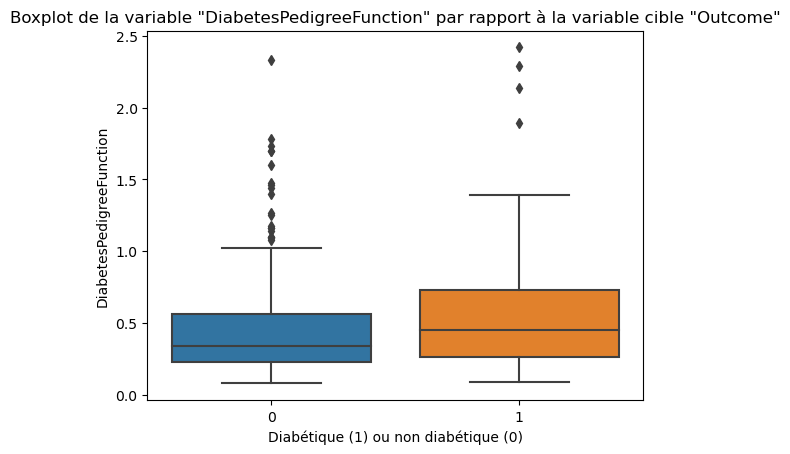

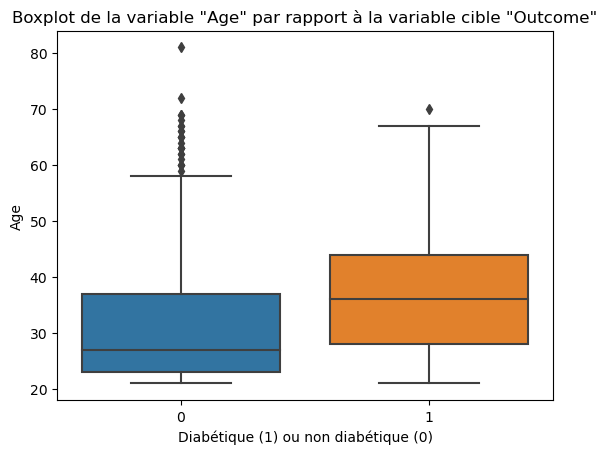

In [11]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(data=diabete, x='Outcome', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "Outcome"')
    plt.xlabel('Diabétique (1) ou non diabétique (0)')
    plt.ylabel(col)
    plt.show()

In [12]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

from scipy.stats import kruskal
p_values = []
for col in num_vars:
    h, pval = kruskal(diabete[col][diabete['Outcome']==0], diabete[col][diabete['Outcome']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)



                               P-value Significative
Variable                                            
Pregnancies               3.741498e-08           Oui
Glucose                   1.198015e-39           Oui
BloodPressure             7.553110e-05           Oui
SkinThickness             1.295554e-02           Oui
Insulin                   6.563377e-02           Non
BMI                       9.716371e-18           Oui
DiabetesPedigreeFunction  1.195553e-06           Oui
Age                       1.140509e-17           Oui


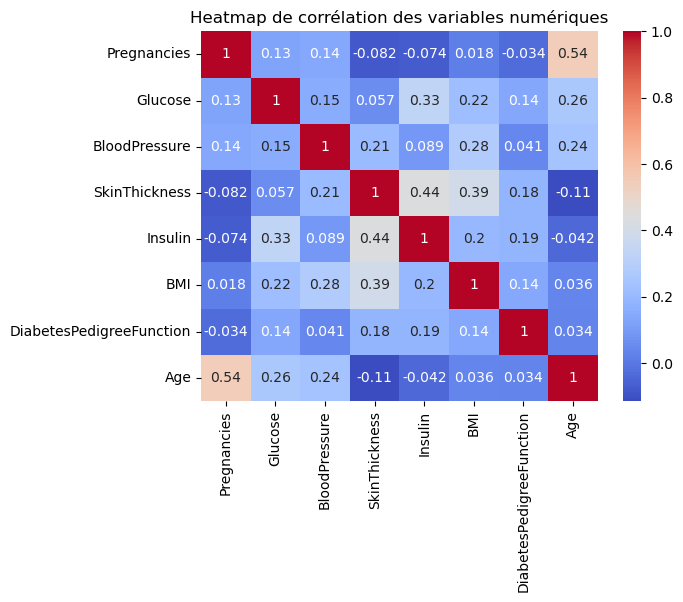

In [13]:
# Sélection des variables numériques
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_num = diabete[num_vars]

# Génération de la heatmap de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

# Modélisation avec Adaboost

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Selection des variables

In [16]:
# Séparation des données en variables prédictives et variable cible
X = diabete.drop('Outcome', axis=1)#Variables prédictives
y = diabete['Outcome']#Variable cible
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Division train test

In [18]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Premier modèle sans optimisation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
# Création et entraînement du modèle
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [21]:

# Sur l'ensemble d'entrainement
train_predictions = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Train Classification Report:")
print(classification_report(y_train, train_predictions))

Train Accuracy: 0.8599348534201955
Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       401
           1       0.82      0.77      0.79       213

    accuracy                           0.86       614
   macro avg       0.85      0.84      0.84       614
weighted avg       0.86      0.86      0.86       614



In [22]:
# Sur l'ensemble de test
test_predictions = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))


Test Accuracy: 0.7402597402597403
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



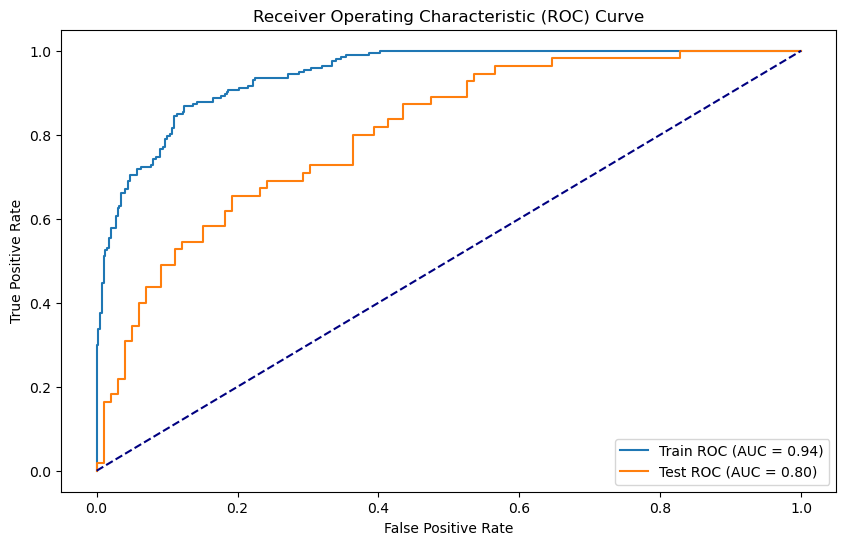

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcul des probabilités pour chaque classe
train_probs = model.predict_proba(X_train)[:, 1]
test_probs = model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calcul des AUC
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Tracé des courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
0               Pregnancies        0.03
1                   Glucose        0.22
2             BloodPressure        0.08
3             SkinThickness        0.03
4                   Insulin        0.13
5                       BMI        0.15
6  DiabetesPedigreeFunction        0.27
7                       Age        0.09


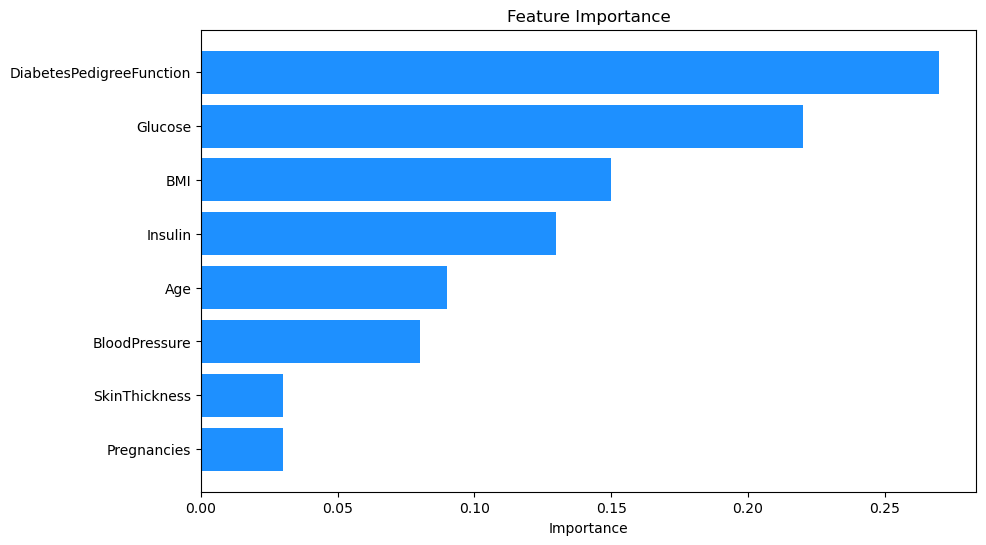

In [24]:
# Obtention de l'importance des caractéristiques
feature_importances = model.feature_importances_

# Création d'un DataFrame pour l'importance des caractéristiques
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Affichage du DataFrame
print(importance_df)

# Création du graphique pour l'importance des caractéristiques
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## Modèle avec Optimisation des paramètres



AdaBoost, pour Adaptive Boosting, est un algorithme d'apprentissage automatique qui est utilisé en conjonction avec d'autres types d'algorithmes pour améliorer leurs performances. **AdaBoost est un algorithme de boosting, qui crée un modèle fort à partir de plusieurs modèles faibles**. 

Il y a deux paramètres principaux à optimiser dans AdaBoost :

### n_estimators

Le paramètre `n_estimators` définit le nombre d'estimateurs (modèles faibles) à utiliser. Plus le nombre d'estimateurs est élevé, plus le modèle sera complexe.

Cependant, si ce nombre est trop élevé, le modèle peut devenir trop complexe et surapprendre les données, ce qui signifie qu'il sera moins capable de généraliser à de nouvelles données. En revanche, si ce nombre est trop faible, le modèle peut ne pas être assez complexe pour bien apprendre les données. C'est donc un équilibre à trouver.

### learning_rate

Le paramètre `learning_rate` contrôle à quel point chaque modèle faible tente de corriger les erreurs des modèles précédents. 

Un taux d'apprentissage plus élevé signifie que chaque modèle tente de corriger davantage les erreurs des modèles précédents, ce qui peut conduire à un modèle plus complexe et à un risque de surapprentissage.

Un taux d'apprentissage plus faible signifie que chaque modèle tente de corriger moins les erreurs des modèles précédents, ce qui peut conduire à un modèle moins complexe et à un risque de sous-apprentissage. Encore une fois, c'est un équilibre à trouver.

L'optimisation de ces paramètres est importante car elle peut grandement affecter la performance du modèle AdaBoost. C'est généralement fait en utilisant une sorte de recherche sur grille ou une recherche aléatoire, qui teste différentes combinaisons de paramètres pour trouver celle qui donne les meilleures performances sur un jeu de données de validation.


In [25]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
# Création du modèle
model = AdaBoostClassifier(random_state=42)

# Définition de la grille de paramètres pour la recherche
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}

In [27]:
# Création et ajustement de GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 50}


In [28]:
# Prédiction et évaluation du modèle
best_model = grid_search.best_estimator_

# Sur l'ensemble d'entrainement
train_predictions = best_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Train Classification Report:")
print(classification_report(y_train, train_predictions))

Train Accuracy: 0.8192182410423453
Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       401
           1       0.78      0.67      0.72       213

    accuracy                           0.82       614
   macro avg       0.81      0.78      0.79       614
weighted avg       0.82      0.82      0.82       614



In [29]:
# Sur l'ensemble de test
test_predictions = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))


Test Accuracy: 0.7662337662337663
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



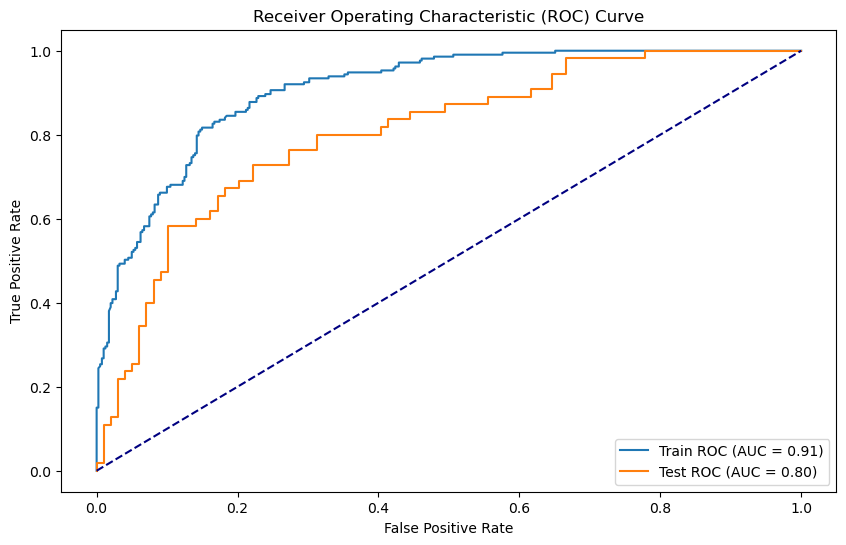

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcul des probabilités pour chaque classe
train_probs = best_model.predict_proba(X_train)[:, 1]
test_probs = best_model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calcul des AUC
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Tracé des courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
0               Pregnancies        0.04
1                   Glucose        0.22
2             BloodPressure        0.08
3             SkinThickness        0.02
4                   Insulin        0.08
5                       BMI        0.16
6  DiabetesPedigreeFunction        0.18
7                       Age        0.22


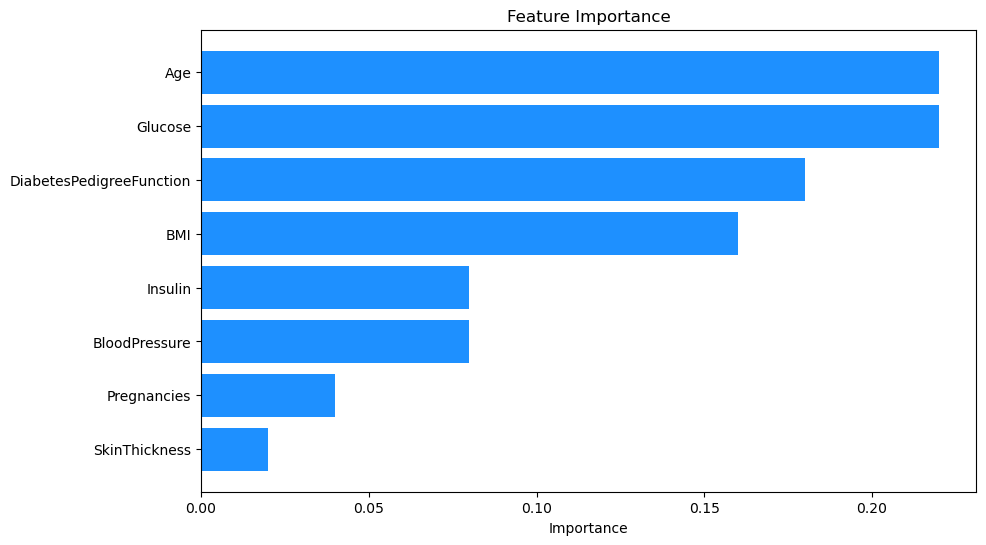

In [31]:
# Obtention de l'importance des caractéristiques
feature_importances = best_model.feature_importances_

# Création d'un DataFrame pour l'importance des caractéristiques
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Affichage du DataFrame
print(importance_df)

# Création du graphique pour l'importance des caractéristiques
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Quizz sur AdaBoost

1. Qu'est-ce qu'AdaBoost?

   - [ ] A. Un algorithme de régression
   - [ ] B. Un algorithme de classification
   - [ ] C. Un algorithme de boosting
   - [ ] D. Un algorithme de clustering

2. Quels sont les principaux paramètres à optimiser dans AdaBoost?

   - [ ] A. `n_clusters` et `max_depth`
   - [ ] B. `n_neighbors` et `weights`
   - [ ] C. `n_estimators` et `learning_rate`
   - [ ] D. `C` et `gamma`

3. Comment peut-on obtenir l'importance des variables dans un modèle AdaBoost en Python?

   - [ ] A. Avec l'attribut `coef_`
   - [ ] B. Avec l'attribut `importances_`
   - [ ] C. Avec l'attribut `feature_importances_`
   - [ ] D. Avec l'attribut `variables_`

4. Comment peut-on optimiser les paramètres dans un modèle AdaBoost en Python?

   - [ ] A. En utilisant une boucle for
   - [ ] B. En utilisant la validation croisée
   - [ ] C. En utilisant une grille de recherche
   - [ ] D. En utilisant l'optimisation par essais de particules
